In [2]:
# Import Libararies

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create


# Read in the data

df = pd.read_csv('/Users/noeebar/data/movies.csv')

In [3]:
# Let's Look at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
# Let's see if there is any missing Data
df=df.dropna()

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [5]:
# Data Types for our columns

df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Change data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [7]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [8]:

df['yearcorrect'] = df['released'].str.extract(pat='([0-9]{4})').astype(int)

In [9]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  yearcorrect  
0   46998772        Warner Bros.    146.0         1980  
1   58853106   Columbia Pictures    104.0         1980  
2  538375067           Lucasfilm    124.0         1980  
3   83453539  Paramount Pictures     88.0         1980  
4   39846344      Orion Pictures     98.0         1980

In [10]:
df=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [11]:
pd.set_option('display.max_rows',None)

In [12]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

Text(0, 0.5, 'Budget for Film')

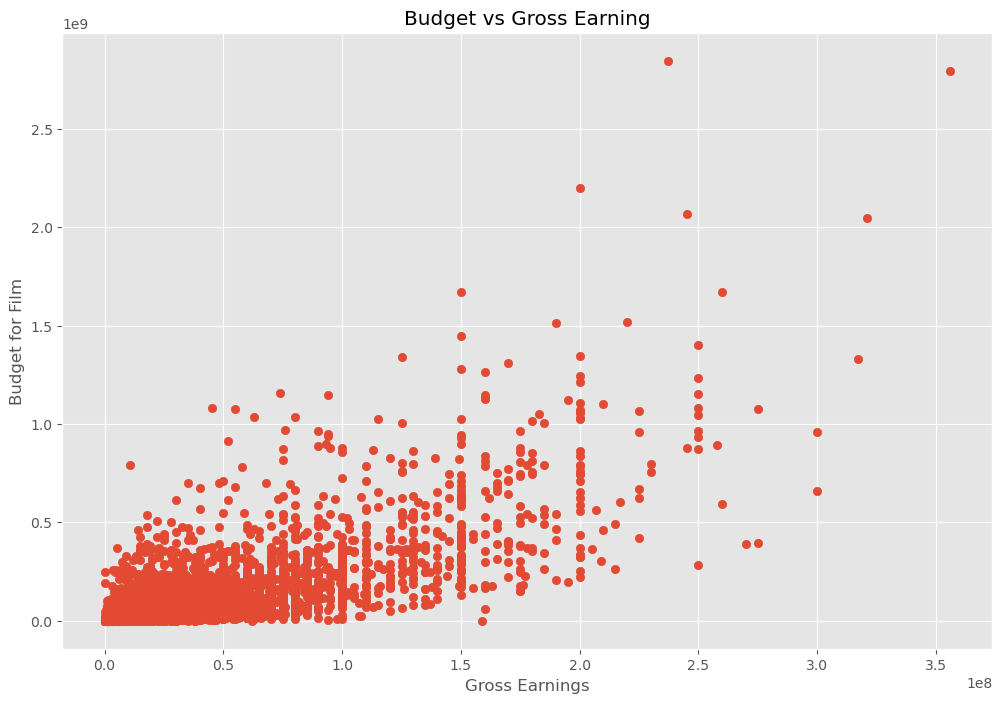

In [13]:
# Scatter plot with budget vs. gross 

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')



In [14]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0         2009  
7445  2797501328         Marvel Studios    181.0         2019  
3045  2201647264  Twentieth Century Fox    194.0         1997  
6663  2069521700              Lucasfilm    138.0         2015  
7244  2048359754         Marvel Studios    149.0         2018

<AxesSubplot:xlabel='budget', ylabel='gross'>

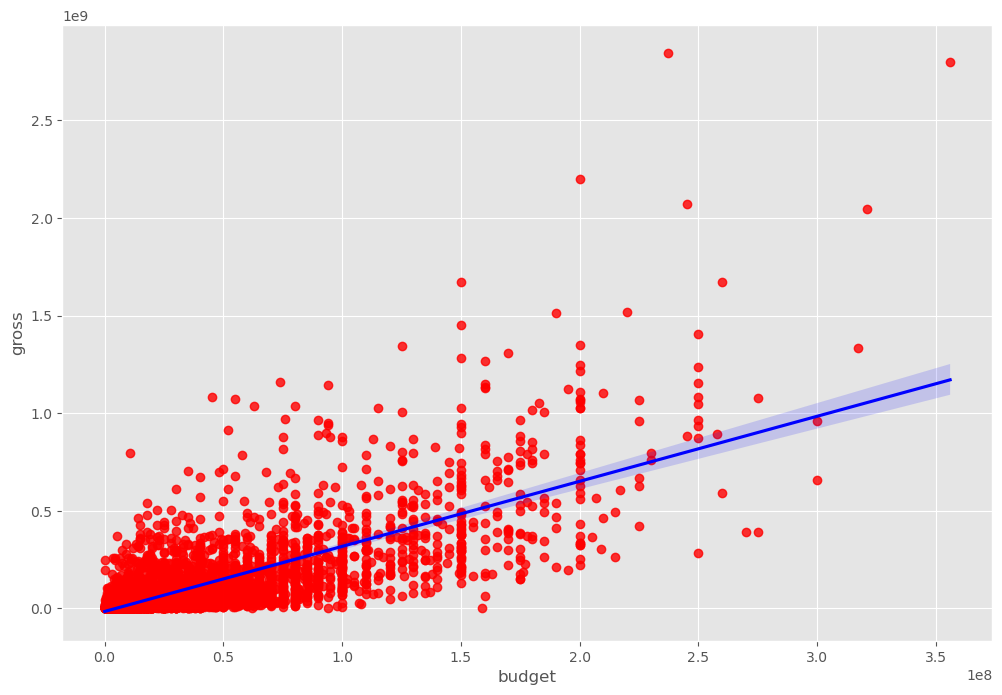

In [15]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [16]:
# Let's start looking at correlation

df.corr(method='pearson')

year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross        0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.268721  
runtime         0.075294  
yearcorrect     1.000000

Text(120.72222222222221, 0.5, 'Movie Features')

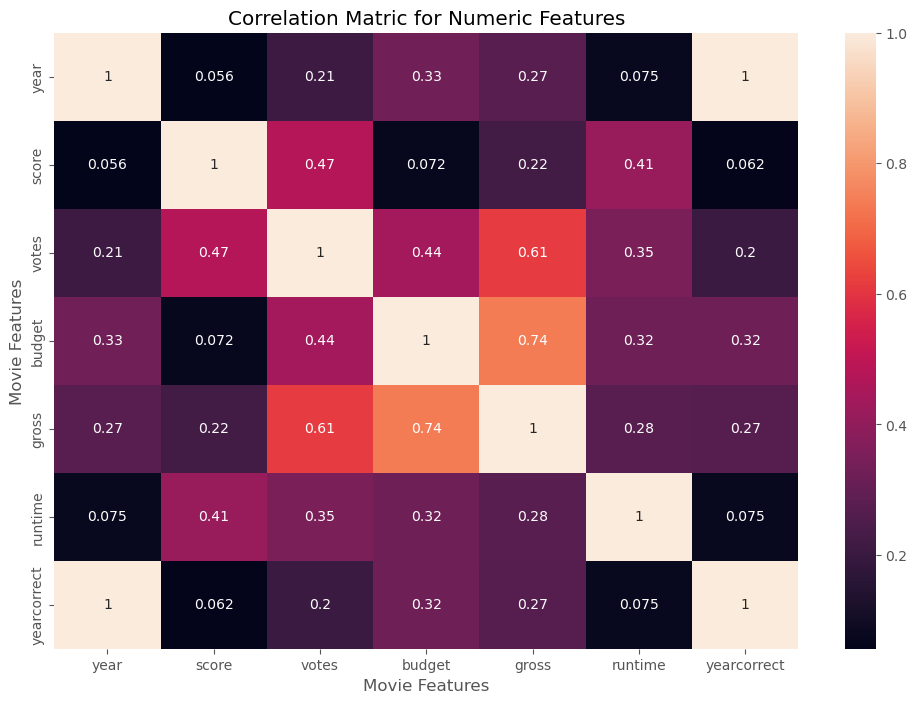

In [17]:
#High correleation between budget and gross

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


In [18]:
#Looks at Company

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0         2009  
7445  2797501328         Marvel Studios    181.0         2019  
3045  2201647264  Twentieth Century Fox    194.0         1997  
6663  2069521700              Lucasfilm    138.0         2015  
7244  2048359754         Marvel Studios    149.0         2018

In [19]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized


name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000.0       785    1263   
7445   388       5      0  2019       137    8.4   903000.0       105     513   
3045  4909       5      6  1997       534    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       529    7.8   876000.0       768    1806   
7244   389       5      0  2018       145    8.4   897000.0       105     513   
7480  4388       4      2  2019      1126    6.9   222000.0      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000.0       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000.0      1060    1646   
6646  1541       5      0  2015       165    7.1   370000.0       809     481   
7494  1530       4      2  2019      2053    6.8   148000.0       277    1383   
6644   387       5      0  2015      1712    7.3   777000.0      1060    1646   
7247   567       5      0  2018       723    7.3   661000.0      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000.0       452    2862   
7075  3644       5      0  2017       500    7.0   581000.0      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000.0       764     777   
6262  1529       4      2  2013      2082    7.4   585000.0       277    1383   
7072   477       4      7  2017      1561    7.1   283000.0       155    2822   
7281  1966       4      2  2018      1325    7.6   263000.0       193     327   
7055  4119       5      0  2017        45    6.6   214000.0       567    1013   
6244  2014       5      0  2013      1881    7.1   779000.0      1767     837   
6688  2545       4      2  2015      1050    6.4   218000.0      1144     362   
6846   750       5      0  2016      1910    7.8   694000.0       105     513   
7250   343       5      0  2018       565    6.9   404000.0       809     699   
4245  4407       5      0  2003       516    8.9  1700000.0      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000.0      1019     479   
7456   755       5      0  2019      1697    6.8   478000.0        96     182   
5878  4950       5      0  2011      1442    6.2   390000.0      1302     886   
6059  3498       5      0  2012      2148    7.7   642000.0      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000.0      1302     886   
2448  4388       1      2  1994      1394    8.5   970000.0      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000.0       317    1606   
7463  3640       5      0  2019       553    6.5   394000.0       768     489   
7450  2091       6      5  2019      2321    8.4  1000000.0      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000.0      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000.0      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000.0       674    2927   
6869  3260       5      0  2016       509    7.8   572000.0       615     492   
7481   206       4      1  2019      1837    6.9   239000.0       705    1468   
5860  2988       5      0  2011      1803    6.6   492000.0      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000.0      1144     524   
2245  2115       5      0  1993      1292    8.1   894000.0      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000.0        81     153   
3451  3637       4      0  1999      1778    6.5   748000.0       653    1046   
5667   215       4      1  2010      1679    6.4   392000.0      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000.0       239     390   
6045  4240       5      1  2012       492    7.8   773000.0      1520     967   
3843  1736       4      1  2001      1987    7.6   685000.0       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000.0       317    1606   
6311  1101       4      2  2013      

In [20]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000.0       785    1263   
7445   388       5      0  2019       137    8.4   903000.0       105     513   
3045  4909       5      6  1997       534    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       529    7.8   876000.0       768    1806   
7244   389       5      0  2018       145    8.4   897000.0       105     513   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  1534       47  237000000  2847246203     1382    162.0         2009  
7445  1470       47  356000000  2797501328      983    181.0         2019  
3045  1073       47  200000000  2201647264     1382    194.0         1997  
6663   356       47  245000000  2069521700      945    138.0         2015  
7244  1470       47  321000000  2048359754      983    149.0         2018

Text(120.72222222222221, 0.5, 'Movie Features')

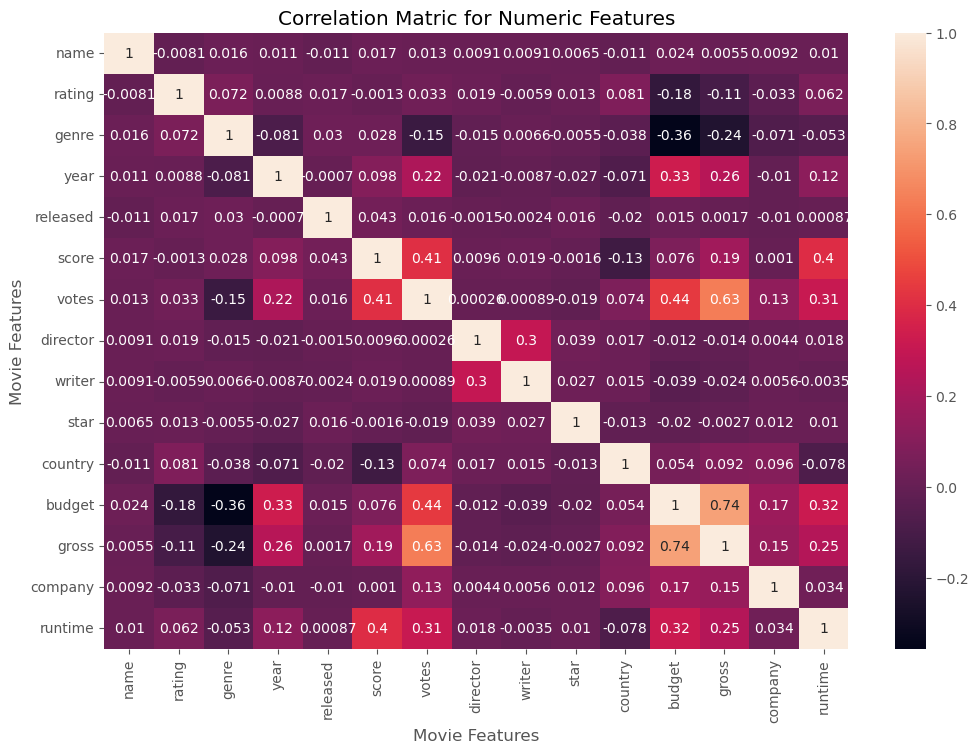

In [9]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [10]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating   -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre     0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year      0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score     0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes     0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director  0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer    0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star      0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country  -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget    0.023970 -0.176002 -0.356564  0.329321  0.014683  0.076254   
gross     0.005533 -0.107339 -0.235650  0.257486  0.001659  0.186258   
company   0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime   0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   

             votes  director    writer      star   country    budget  \
name      0.013088  0.009079  0.009081  0.006472 -0.010737  0.023970   
rating    0.033225  0.019483 -0.005921  0.013405  0.081244 -0.176002   
genre    -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.356564   
year      0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.329321   
released  0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.014683   
score     0.409182  0.009559  0.019416 -0.001609 -0.133348  0.076254   
votes     1.000000  0.000260  0.000892 -0.019282  0.073625  0.442429   
director  0.000260  1.000000  0.299067  0.039234  0.017490 -0.012272   
writer    0.000892  0.299067  1.000000  0.027245  0.015343 -0.039451   
star     -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019589   
country   0.073625  0.017490  0.015343 -0.012998  1.000000  0.054063   
budget    0.442429 -0.012272 -0.039451 -0.019589  0.054063  1.000000   
gross     0.630757 -0.014441 -0.023519 -0.002717  0.092129  0.740395   
company   0.133204  0.004404  0.005646  0.012442  0.095548  0.173214   
runtime   0.309212  0.017624 -0.003511  0.010174 -0.078412  0.320447   

             gross   company   runtime  
name      0.005533  0.009211  0.010392  
rating   -0.107339 -0.032943  0.062145  
genre    -0.235650 -0.071067 -0.052711  
year      0.257486 -0.010431  0.120811  
released  0.001659 -0.010474  0.000868  
score     0.186258  0.001030  0.399451  
votes     0.630757  0.133204  0.309212  
director -0.014441  0.004404  0.017624  
writer   -0.023519  0.005646 -0.003511  
star     -0.002717  0.012442  0.010174  
country   0.092129  0.095548 -0.078412  
budget    0.740395  0.173214  0.320447  
gross     1.000000  0.154840  0.245216  
company   0.154840  1.000000  0.034402  
runtime   0.245216  0.034402  1.000000

In [11]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [12]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget   genre     -0.356564
genre    budget    -0.356564
         gross     -0.235650
gross    genre     -0.235650
rating   budget    -0.176002
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [13]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings

#Company has low correlation